In [1]:
# MLP para classificação multiclasses
import time as time
from numpy import argmax
from matplotlib import pyplot
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Carregando a base de dados
path = 'https://raw.githubusercontent.com/muriloasouza/Doutorado/master/Flower_Multiclass.txt'
df = read_csv(path, header=None)
# Dividindo em coluncas de entrada e saída
X = df.values[:, :-1] # Todas as linhas e todas as colunas menos a última
y = df.values[:, -1] # Todas as linhas e a última coluna
# Mudando todos os dados de entrada para ponto flutuante
X = X.astype('float32')
# Transformando as strings em numeros inteiros
y = LabelEncoder().fit_transform(y) # A saída são strings com os nomes das 3 flores que serão transformadas em classe (0, 1 e 2)

In [3]:
# Dividindo a base de dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle = True) # Embaralhando e dividindo
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Determinando o numero de caracteristicas (features)
n_features = X_train.shape[1]
print(n_features)

(100, 4) (50, 4) (100,) (50,)
4


In [4]:
# Definindo o modelo (Dense indica uma camada totalmente conectada)
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax')) # 3 classes
# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Ajustando o modelo com o conjunto de treinamento
print('Ajustando o modelo com o conjunto de treinamento')
t = time.time()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), verbose=2)
print("Tempo: %.4f minutes" % ((time.time() - t)/60))

Ajustando o modelo com o conjunto de treinamento
Epoch 1/150
4/4 - 0s - loss: 1.1952 - accuracy: 0.3600 - val_loss: 1.2299 - val_accuracy: 0.2800
Epoch 2/150
4/4 - 0s - loss: 1.1423 - accuracy: 0.3600 - val_loss: 1.1753 - val_accuracy: 0.2800
Epoch 3/150
4/4 - 0s - loss: 1.0971 - accuracy: 0.3600 - val_loss: 1.1331 - val_accuracy: 0.2800
Epoch 4/150
4/4 - 0s - loss: 1.0621 - accuracy: 0.3600 - val_loss: 1.0927 - val_accuracy: 0.2800
Epoch 5/150
4/4 - 0s - loss: 1.0320 - accuracy: 0.3600 - val_loss: 1.0568 - val_accuracy: 0.2800
Epoch 6/150
4/4 - 0s - loss: 1.0003 - accuracy: 0.3600 - val_loss: 1.0253 - val_accuracy: 0.2800
Epoch 7/150
4/4 - 0s - loss: 0.9772 - accuracy: 0.3700 - val_loss: 0.9983 - val_accuracy: 0.2600
Epoch 8/150
4/4 - 0s - loss: 0.9586 - accuracy: 0.3500 - val_loss: 0.9769 - val_accuracy: 0.2400
Epoch 9/150
4/4 - 0s - loss: 0.9428 - accuracy: 0.2100 - val_loss: 0.9595 - val_accuracy: 0.1400
Epoch 10/150
4/4 - 0s - loss: 0.9324 - accuracy: 0.1300 - val_loss: 0.9434 - v

Epoch 83/150
4/4 - 0s - loss: 0.4871 - accuracy: 0.8600 - val_loss: 0.4354 - val_accuracy: 0.8800
Epoch 84/150
4/4 - 0s - loss: 0.4829 - accuracy: 0.8900 - val_loss: 0.4330 - val_accuracy: 0.9400
Epoch 85/150
4/4 - 0s - loss: 0.4795 - accuracy: 0.9200 - val_loss: 0.4296 - val_accuracy: 0.9800
Epoch 86/150
4/4 - 0s - loss: 0.4762 - accuracy: 0.9400 - val_loss: 0.4267 - val_accuracy: 0.9800
Epoch 87/150
4/4 - 0s - loss: 0.4726 - accuracy: 0.9500 - val_loss: 0.4240 - val_accuracy: 0.9800
Epoch 88/150
4/4 - 0s - loss: 0.4699 - accuracy: 0.9600 - val_loss: 0.4202 - val_accuracy: 0.9800
Epoch 89/150
4/4 - 0s - loss: 0.4660 - accuracy: 0.9600 - val_loss: 0.4154 - val_accuracy: 0.9400
Epoch 90/150
4/4 - 0s - loss: 0.4635 - accuracy: 0.9000 - val_loss: 0.4113 - val_accuracy: 0.8600
Epoch 91/150
4/4 - 0s - loss: 0.4613 - accuracy: 0.8800 - val_loss: 0.4080 - val_accuracy: 0.8200
Epoch 92/150
4/4 - 0s - loss: 0.4597 - accuracy: 0.8500 - val_loss: 0.4050 - val_accuracy: 0.8000
Epoch 93/150
4/4 - 0

In [6]:
# Avaliando o modelo com o conjunto de teste
print('Avaliando o modelo com o conjunto de teste')
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Perdas no teste: %.4f' % loss)
print('Acurácia no teste: %.4f' % acc)

Avaliando o modelo com o conjunto de teste
Perdas no teste: 0.2831
Acurácia no teste: 0.9800


In [7]:
# Fazendo uma predição
linha = [5.1,3.5,1.4,0.2]
ychapeu = model.predict([linha])
print('Predita: %s (class=%d)' % (ychapeu, argmax(ychapeu)))

Predita: [[0.943865   0.05490653 0.00122844]] (class=0)


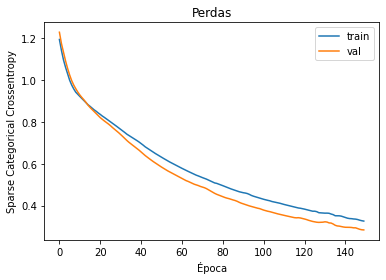

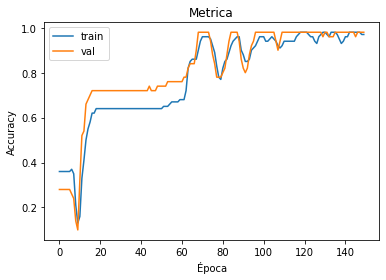

In [8]:
# Plotando curvas de perdas e métrica
pyplot.title('Perdas')
pyplot.xlabel('Época')
pyplot.ylabel('Sparse Categorical Crossentropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

pyplot.title('Metrica')
pyplot.xlabel('Época')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [9]:
# Salvando o modelo em um arquivo
model.save('MLP_Flower_Multiclass.h5-Final')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: MLP_Flower_Multiclass.h5-Final\assets
